In this notebook, I used several websites to help.

1.  The design of this notebook starts out as a Kevin Markham Jupyter Notebook from his Data Science School's section on scikit-learn machine learning. Notebooks can be obtained here: https://github.com/justmarkham/scikit-learn-videos. I take the Iris data and expand on his examples. I also import the Iris data into a pandas dataframe, which seems more appropriate to me. 

2. I used https://d3ansictanv2wj.cloudfront.net/scikit-learn-flow-chart-5d2262f1051e76f9a17e2c6cb451335e.jpg to help me decide which scikit-learn algorithm to use based on the question I want to answer and the dataset I'm working with.  

3. The Iris dataset was also used by several team members who built scikit-learn. I will try and match their work.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Introducing the iris dataset

![Iris](images/03_iris.png)

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width

In [3]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [4]:
# READ IN DATA TO A PANDAS DATAFRAME
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
data.shape

(150, 5)

In [6]:
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
data.columns = colnames

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
# ASSIGN A NUMBER TO A SPECIFIC SPECIES. WILL USE THESE NUMBERS INSTEAD OF NAMES.
data['Species'] = data['species'].map( {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} ).astype(int)

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [12]:
data.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

---

# MODEL TRAINING DATA:
    X - all the data in columns sepal_length through petal_width
    y - 0s, 1s, and 2s from the Species column. Defines species. 
    
We will train a model with this data so that it can correctly predict the species of an Iris based on its measurements of sepal lenght, sepal width, petal length, and petal width. 

In [13]:
# training data 

X = data.loc[:,'sepal_length':'petal_width']
y = data.Species

In [14]:
print(X.shape), print(y.shape)

(150, 4)
(150,)


(None, None)

# A few Plots of the IRIS data

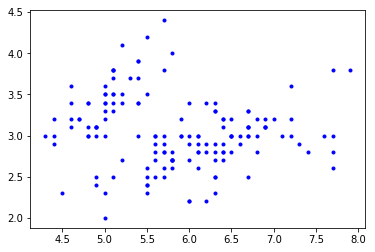

In [15]:
plt.plot(data.sepal_length, data.sepal_width, 'b.')

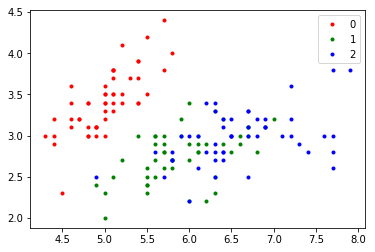

In [16]:
plt.plot(data.loc[data.Species==0,:].sepal_length, 
         data.loc[data.Species==0,:].sepal_width, 
         'r.',
         label='0')

plt.plot(data.loc[data.Species==1,:].sepal_length, 
         data.loc[data.Species==1,:].sepal_width, 
         'g.',
         label='1')

plt.plot(data.loc[data.Species==2,:].sepal_length, 
         data.loc[data.Species==2,:].sepal_width, 
         'b.',
         label='2')
plt.legend()
plt.show()

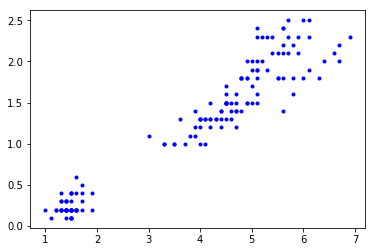

In [17]:
plt.plot(data.petal_length, data.petal_width, 'b.')

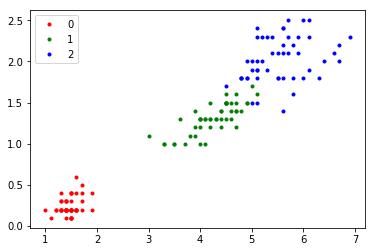

In [18]:
plt.plot(data.loc[data.Species==0,:].petal_length, 
         data.loc[data.Species==0,:].petal_width, 
         'r.',
         label='0')

plt.plot(data.loc[data.Species==1,:].petal_length, 
         data.loc[data.Species==1,:].petal_width, 
         'g.',
         label='1')

plt.plot(data.loc[data.Species==2,:].petal_length, 
         data.loc[data.Species==2,:].petal_width, 
         'b.',
         label='2')
plt.legend()
plt.show()

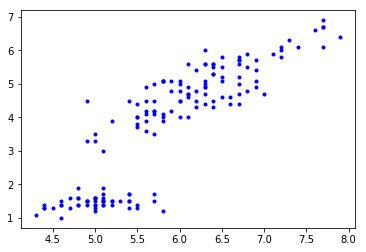

In [19]:
plt.plot(data.sepal_length, data.petal_length, 'b.')

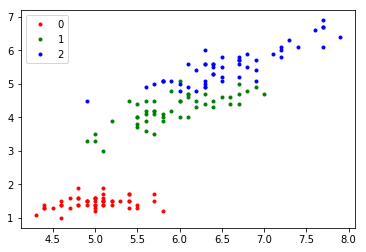

In [20]:
plt.plot(data.loc[data.Species==0,:].sepal_length, 
         data.loc[data.Species==0,:].petal_length, 
         'r.',
         label='0')

plt.plot(data.loc[data.Species==1,:].sepal_length, 
         data.loc[data.Species==1,:].petal_length, 
         'g.',
         label='1')

plt.plot(data.loc[data.Species==2,:].sepal_length, 
         data.loc[data.Species==2,:].petal_length, 
         'b.',
         label='2')
plt.legend()
plt.show()

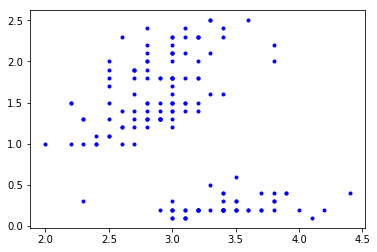

In [21]:
plt.plot(data.sepal_width, data.petal_width, 'b.')

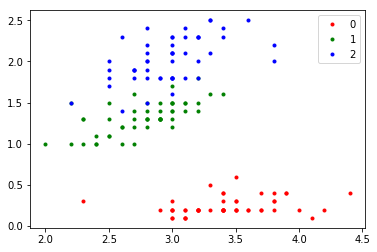

In [22]:
plt.plot(data.loc[data.Species==0,:].sepal_width, 
         data.loc[data.Species==0,:].petal_width, 
         'r.',
         label='0')

plt.plot(data.loc[data.Species==1,:].sepal_width, 
         data.loc[data.Species==1,:].petal_width, 
         'g.',
         label='1')

plt.plot(data.loc[data.Species==2,:].sepal_width, 
         data.loc[data.Species==2,:].petal_width, 
         'b.',
         label='2')
plt.legend()
plt.show()

## Clearly there are relationships here!

In [23]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [24]:
?data.corr

# Correlations -- pearson and spearman

In [25]:
data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [26]:
data.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,1.000000,-0.159457,0.881386,0.834421,0.798078
sepal_width,-0.159457,1.000000,-0.303421,-0.277511,-0.434348
petal_length,0.881386,-0.303421,1.000000,0.936003,0.935441
petal_width,0.834421,-0.277511,0.936003,1.000000,0.937850
Species,0.798078,-0.434348,0.935441,0.937850,1.000000


# Covariance
https://en.wikipedia.org/wiki/Covariance_matrix

In [35]:
data.loc[:,'sepal_length':'petal_width'].cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


In [30]:
data.cov()

,sepal_length,sepal_width,petal_length,petal_width,Species
sepal_length,0.685694,-0.039268,1.273682,0.516904,0.530872
sepal_width,-0.039268,0.188004,-0.321713,-0.117981,-0.148993
petal_length,1.273682,-0.321713,3.113179,1.296387,1.371812
petal_width,0.516904,-0.117981,1.296387,0.582414,0.597987
Species,0.530872,-0.148993,1.371812,0.597987,0.671141


In [32]:
?data.cov

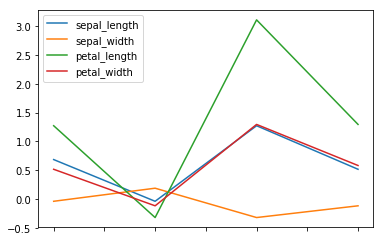

In [49]:
data.loc[:,'sepal_length':'petal_width'].cov().plot()

In [51]:
k = data.loc[:,'sepal_length':'petal_width']

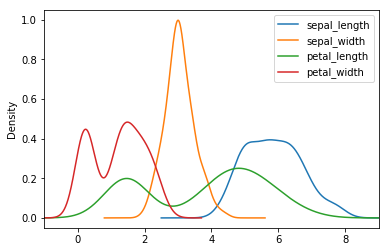

In [68]:
k.plot.kde(xlim=[-1,9])

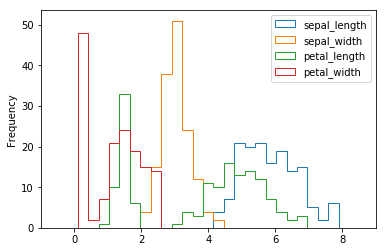

In [76]:
k.plot.hist(bins=25, alpha=1, xlim=[-1,9], histtype='step')

In [53]:
k.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


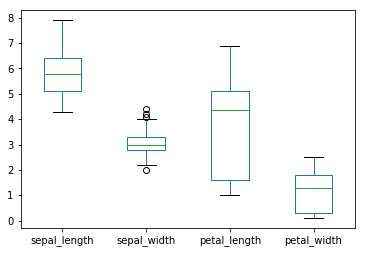

In [80]:
k.plot.box()

---
---

# 1. Nearest Neighbors Classification

Documentation: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

The first example we will provide is for Nearest Neighbors Classification. 

* The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [39]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### predict the species based on a measurement

In [40]:
knn.predict([[3, 5, 4, 2]])

array([2])

In [41]:
knn.predict([[5, 4, 1.3, .2]])

array([0])

In [42]:
knn.predict([[6, 4, 5, 1]])

array([1])

In [43]:
knn.classes_

array([0, 1, 2])

In [44]:
# Can predict multiple observations at once
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

array([2, 1, 1])

### using a different number for k neighbors

In [ ]:
# using a different number for k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn

In [ ]:
knn.fit(X, y)

In [ ]:
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

Changing k to 5 did a terrible job! All were predicted to be the same species. 

Follow this website now:
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

# 2. Linear SVC
Documentation: https://scikit-learn.org/stable/modules/svm.html#svm, https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#

* SVC: Support Vector Classification
* SVM: Support Vector Machines
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

In [ ]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X, y)

In [ ]:
clf.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

In [ ]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

print(clf.coef_)

print(clf.intercept_)

print(clf.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]]))

#print(clf.predict([[0, 0, 0, 0]]))

In [ ]:
print(clf.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]]))



https://scikit-learn.org/stable/modules/svm.html#svm
Try and follow this website now. 

# 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict([[3, 5, 4, 2], [5, 4, 3, 2], [6, 4, 5, 1]])

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)
- [Logistic Regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (user guide), [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (class documentation)
- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)